In [7]:
! pip install pip requests --user


import pandas as pd
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from pandas_datareader import data as web
import plotly
import requests

req = requests.get('https://www.kaggle.com/camnugent/sandp500')
url_content = req.content
csv_file = open('allstocks5yr.csv', 'wb')


df = pd.read_csv('allstocks5yr.csv')


EmptyDataError: No columns to parse from file

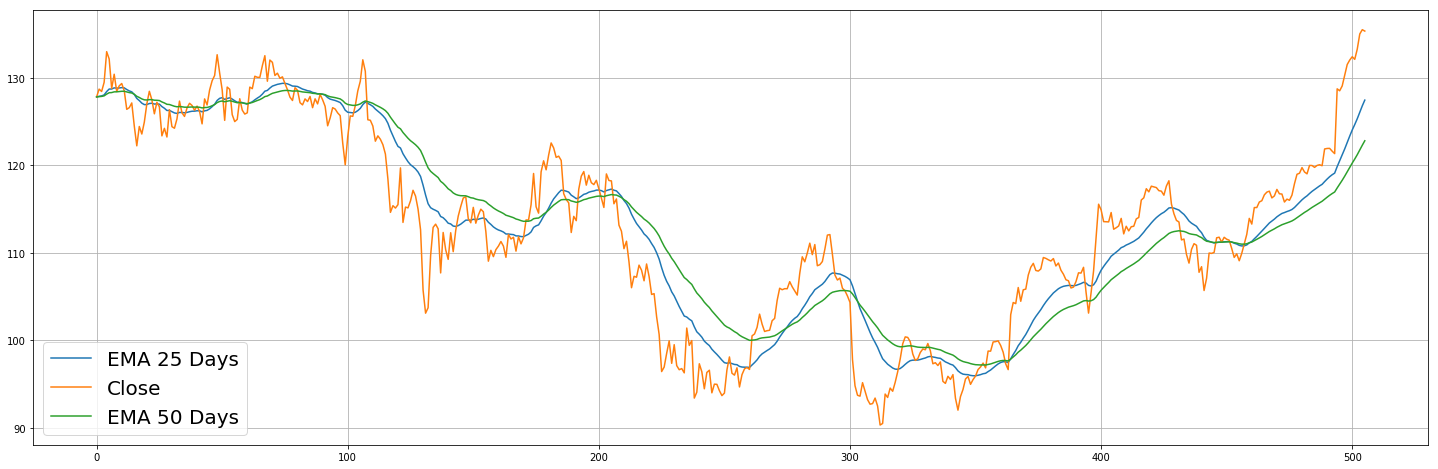

In [94]:
close=df['AAPL.Close']
df['SMA 10'] = close.rolling(window=10).mean()
df['EMA 50'] = close.ewm(span=50,adjust=False).mean()
df['EMA 25'] = close.ewm(span=25,adjust=False).mean()



from pandas import DataFrame
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size


   


plt.figure()
plt.grid(True)
plt.plot(df['EMA 25'],label='EMA 25 Days')
plt.plot(df['AAPL.Close'],label='Close')
plt.plot(df['EMA 50'],label='EMA 50 Days')
plt.legend(loc='lower left', prop={'size':20})
plt.show()






In [107]:
df['Position']=0
df.drop(["Position"], axis = 1, inplace = True) 

df['Position']=0
df.head()




,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction,pandas_SMA_10,SMA 10,EMA 40,EMA 50,EMA 25,Position
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing,NaN,NaN,127.830002,127.830002,127.830002,0
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing,NaN,NaN,127.873417,127.864906,127.898460,0
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing,NaN,NaN,127.901542,127.887848,127.940887,0
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing,NaN,NaN,127.979516,127.951073,128.060822,0
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing,NaN,NaN,128.224418,128.149063,128.440750,0


C:\Users\Lenovo\Anaconda1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


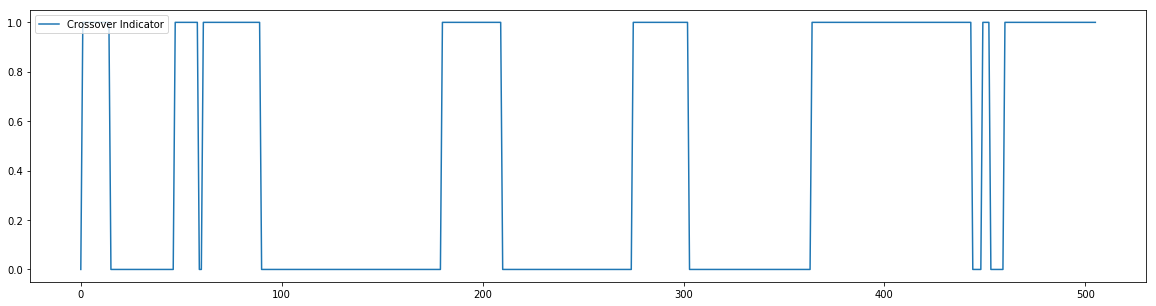

In [108]:

for ind in df.index:
    if df['EMA 25'][ind] > df['EMA 50'][ind]:
        df['Position'][ind]=1;

plt.figure(figsize=[20,5])
plt.plot(df['Position'], label='Crossover Indicator')
plt.legend(loc='upper left')
plt.show()
    
        
        
       
    

In [132]:


df['Diff']=float(0)
for ind in df.index:
     df['Diff'][ind]=df['EMA 25'][ind] - df['EMA 50'][ind].astype(float)
       






        


C:\Users\Lenovo\Anaconda1\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [138]:
df['EMA of Diff'] = df['Diff'].ewm(span=12,adjust=True).mean()
df.head()




,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction,pandas_SMA_10,SMA 10,EMA 40,EMA 50,EMA 25,Position,Diff,EMA of Diff
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing,NaN,NaN,127.830002,127.830002,127.830002,0,0.000000,0.000000
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing,NaN,NaN,127.873417,127.864906,127.898460,1,0.033554,0.018175
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing,NaN,NaN,127.901542,127.887848,127.940887,1,0.053040,0.031783
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing,NaN,NaN,127.979516,127.951073,128.060822,1,0.109749,0.056394
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing,NaN,NaN,128.224418,128.149063,128.440750,1,0.291687,0.120322


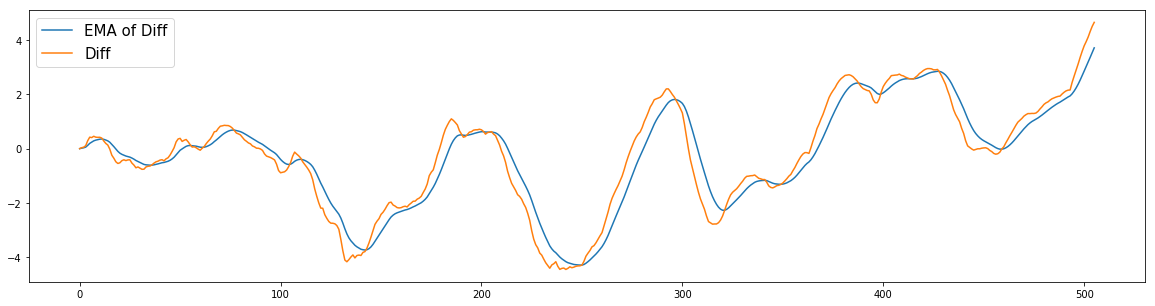

In [142]:
plt.figure(figsize=[20,5])
plt.plot(df['EMA of Diff'], label='EMA of Diff')
plt.plot(df['Diff'], label='Diff')

plt.legend(loc='upper left', prop={'size':15})
plt.show()

In [143]:
df['Position1']=0

In [144]:
for ind in df.index:
    if df['EMA of Diff'][ind] > df['Diff'][ind]:
        df['Position1'][ind]=1;
        
df.head()        

C:\Users\Lenovo\Anaconda1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction,pandas_SMA_10,SMA 10,EMA 40,EMA 50,EMA 25,Position,Diff,EMA of Diff,Position1
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing,NaN,NaN,127.830002,127.830002,127.830002,0,0.000000,0.000000,0
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing,NaN,NaN,127.873417,127.864906,127.898460,1,0.033554,0.018175,0
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing,NaN,NaN,127.901542,127.887848,127.940887,1,0.053040,0.031783,0
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing,NaN,NaN,127.979516,127.951073,128.060822,1,0.109749,0.056394,0
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing,NaN,NaN,128.224418,128.149063,128.440750,1,0.291687,0.120322,0


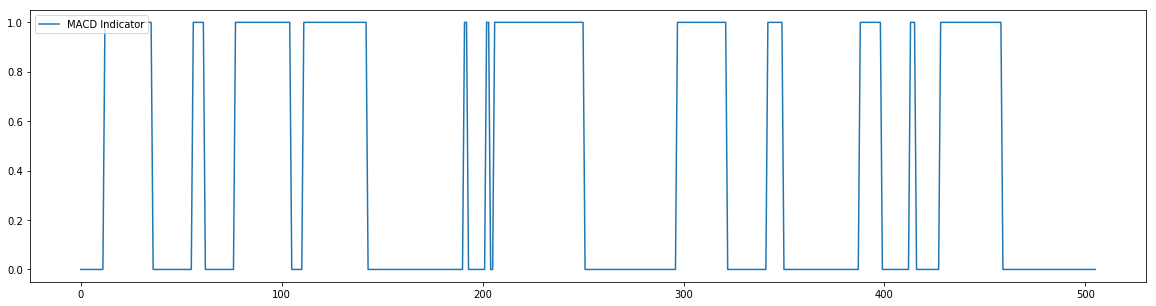

In [145]:
plt.figure(figsize=[20,5])
plt.plot(df['Position1'], label='MACD Indicator')
plt.legend(loc='upper left')
plt.show()